In [1]:
from IPython.display import clear_output
import random

In [4]:
%run sim_network.ipynb
%run berkeley.ipynb
%run util.ipynb
%run show_plt.ipynb

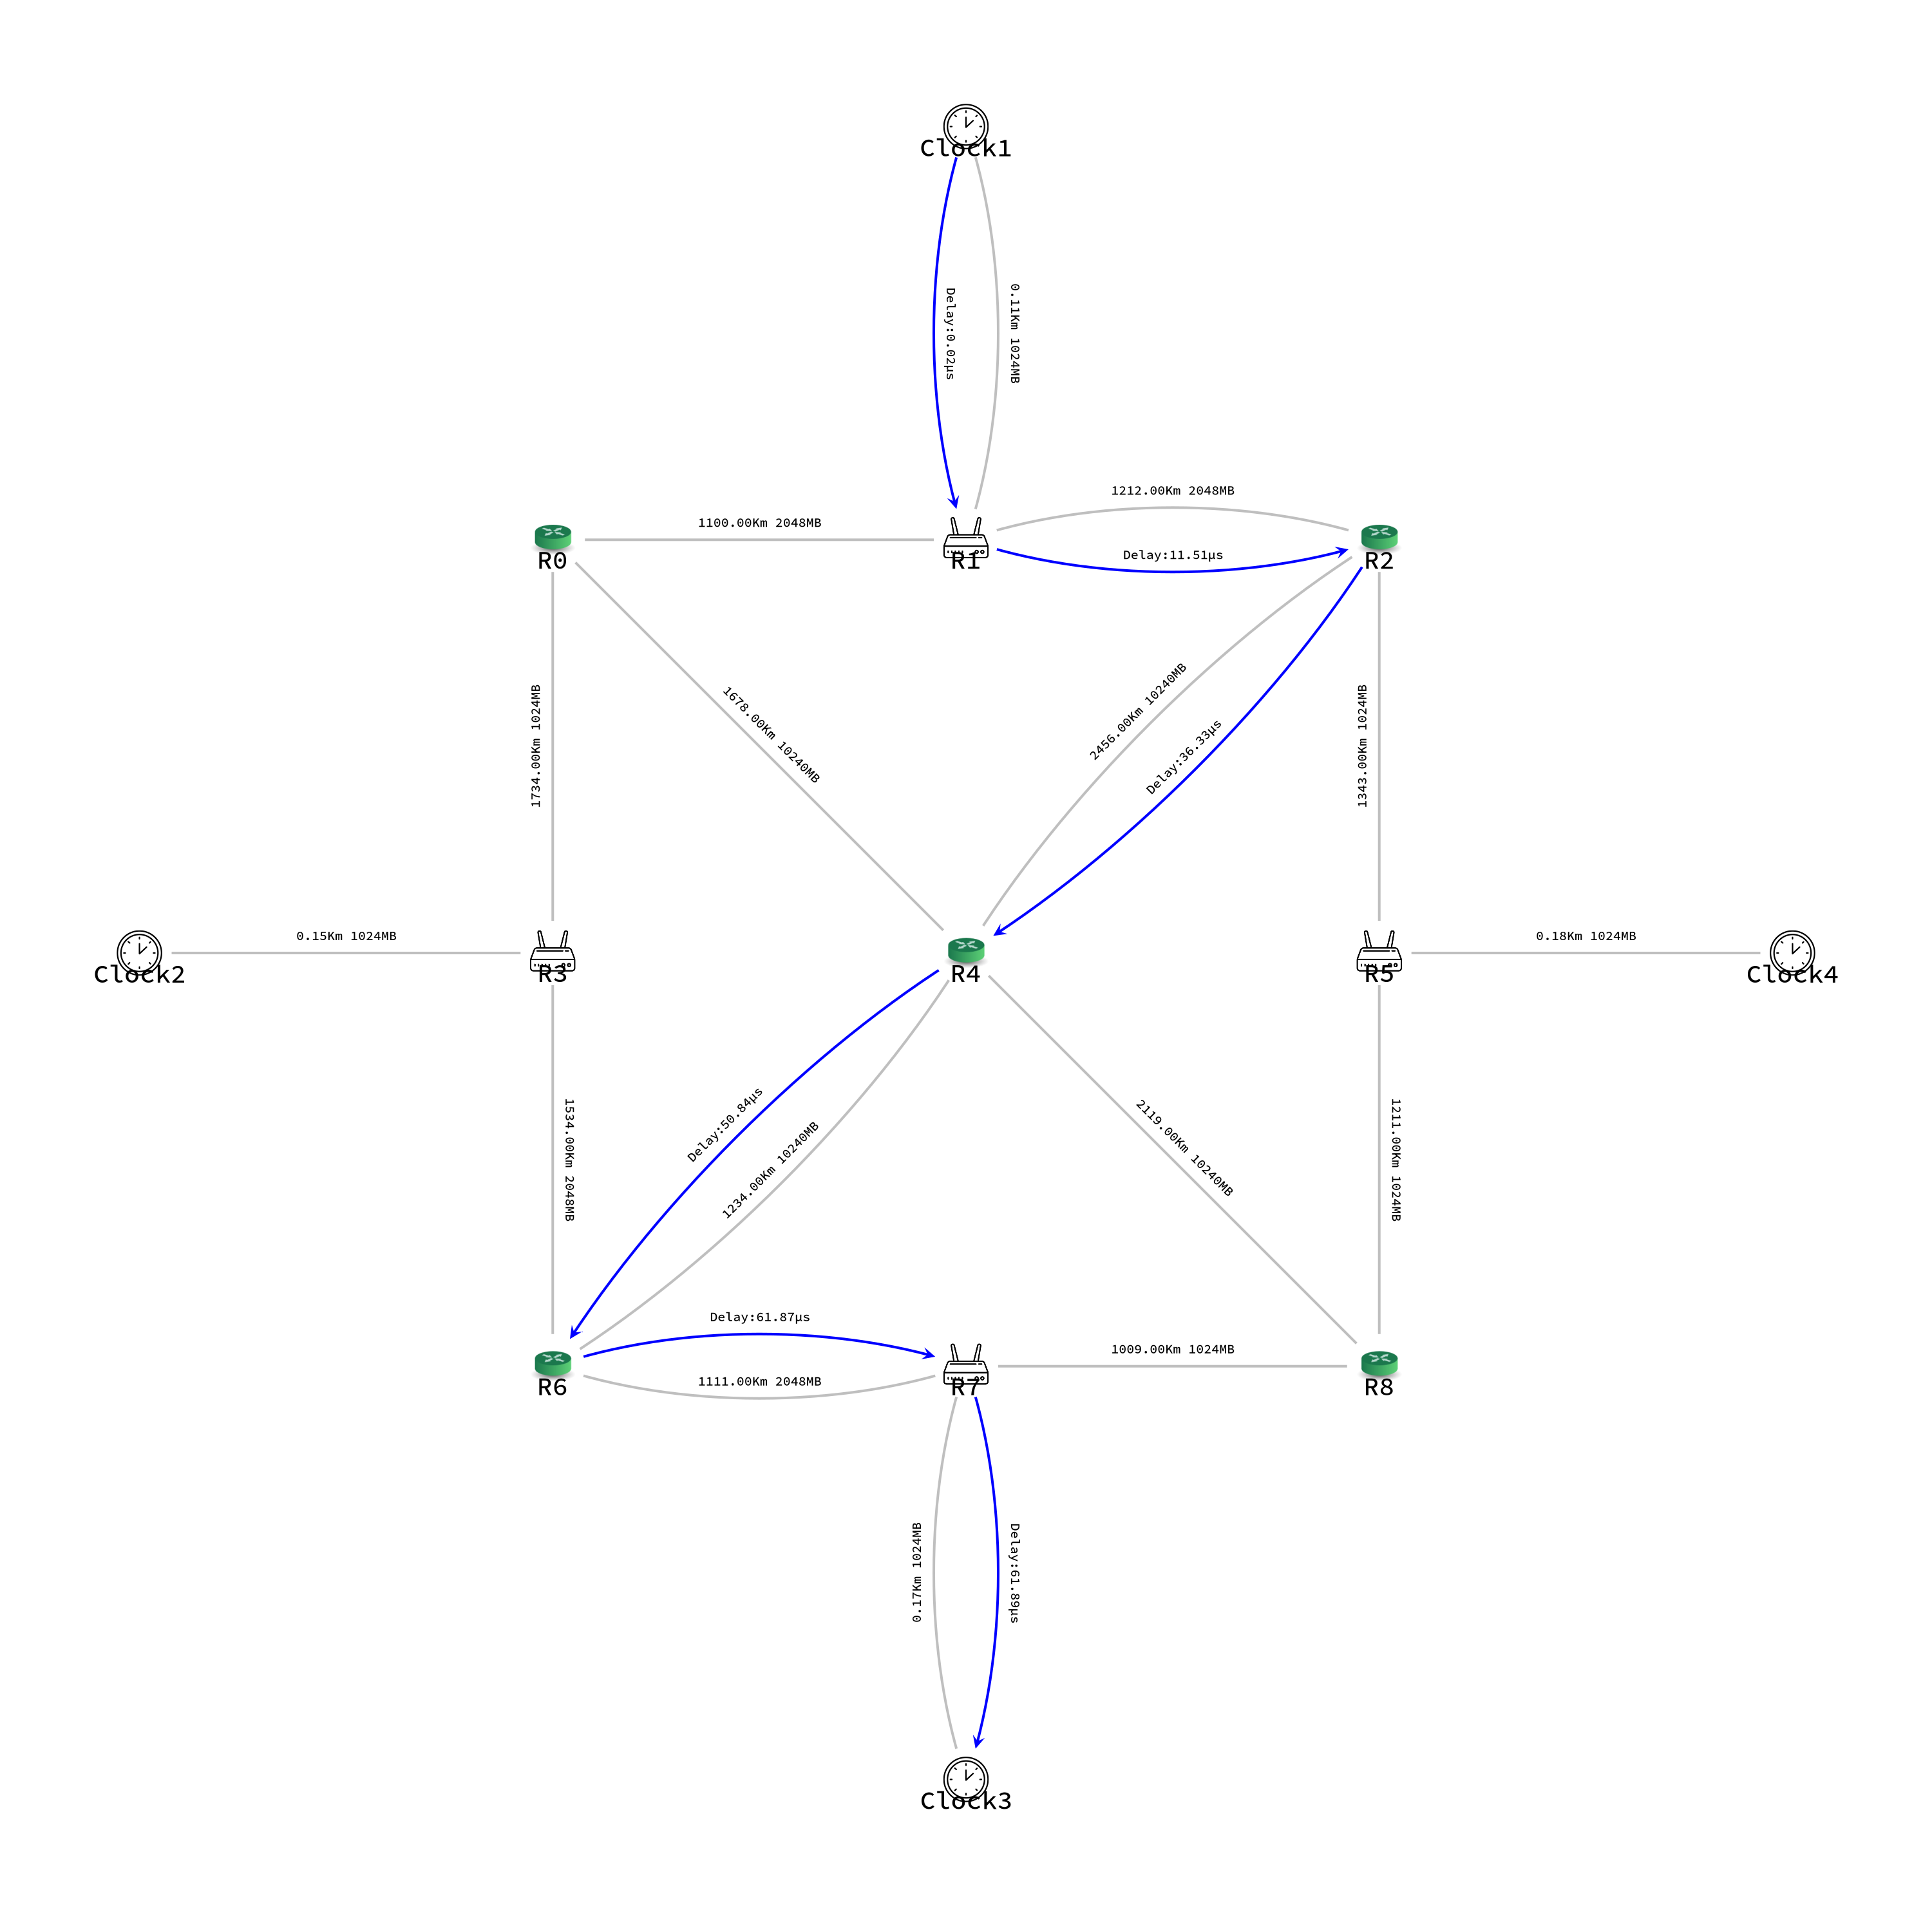

In [5]:
print_g_route()

In [6]:
stride = float(config.get('config', 'simulate_stride'))

true_time = 0.0
error_nodes_data = {}
clocks = get_clocks(nodes)
main_clock = get_main_clock(clocks)
print(f"main clock = {main_clock.show_name}")
slave_clocks = get_slave_clocks(clocks,main_clock)
error_nodes_data['true time'] = []
for clock in clocks:
    error_nodes_data[clock] = []

def set_error_nodes_data(error_nodes_data):
    error_nodes_data['true time'].append(true_time)
    for clock in clocks:
        error_nodes_data[clock].append(clock.time)

main clock = Clock1


In [10]:
remove_file(config.get('config', 'output_clocks_delay'),"*.csv")
remove_file(config.get('config', 'output_link_info'),"*.csv")
remove_file(config.get('config', 'output_visualization'),"*.png")
step = 0
while step < int(config.get('config', 'simulate_max_steps')):
    step+=1
    print(f'\nstep{step}---------------------------------------------------------------')
    print(f'          {format_time_units()}          {format_time_units()}')
    print(f'True Time {format_time(true_time)}\n')
    set_error_nodes_data(error_nodes_data)
    for clock in clocks:
        print(f'{clock.show_name}    {format_time(clock.time)}    Error:{format_time(clock.time - true_time)}')
        clock.time += stride+clockDeltaTime(step*stride)
    true_time += stride
    reset_all_links_delay(links,package_size)
    for slave_clock in slave_clocks:
        clear_all_route(g,routes,links)
        create_best_route(main_clock.name,slave_clock.name)
        set_default_properties(links,nodes)
        print_g_route(f"output/visualization/{step}_{main_clock.show_name} To {slave_clock.show_name}.png")
    save_all_links_delay(links,step)
    if step % 10 == 0:
        new_time = run_berkeley_algorithm(main_node=clock.show_name,step=step)
        print(f"Target Time :{new_time}")
        for clock in clocks:
            print(f"Correction of {clock.show_name}: {float(new_time)-clock.time}")
            clock.time = float(new_time)
        time.sleep(float(config.get('config', 'simulate_berkeley_wait_time')))
    time.sleep(float(config.get('config', 'simulate_normal_wait_time')))


step1---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 09:26:40 000 000 000 000

Clock1    09:26:40 270 126 869 924    Error:00:00:00 270 126 869 923
Clock2    09:26:40 270 126 870 000    Error:00:00:00 270 126 869 996
Clock3    09:26:40 270 126 869 946    Error:00:00:00 270 126 869 945
Clock4    09:26:40 270 126 870 010    Error:00:00:00 270 126 870 011

step2---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 09:43:20 000 000 000 000

Clock1    09:43:20 271 127 870 044    Error:00:00:00 271 127 870 044
Clock2    09:43:20 271 127 870 110    Error:00:00:00 271 127 870 109
Clock3    09:43:20 271 127 870 060    Error:00:00:00 271 127 870 058
Clock4    09:43:20 271 127 870 095    Error:00:00:00 271 127 870 095

step3---------------------------------------------------------------
          hh:mm:ss |ms |µs |


step19---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 14:26:40 000 000 000 000

Clock1    14:26:40 467 365 594 750    Error:00:00:00 467 365 594 748
Clock2    14:26:40 467 365 594 830    Error:00:00:00 467 365 594 828
Clock3    14:26:40 467 365 594 726    Error:00:00:00 467 365 594 726
Clock4    14:26:40 467 365 594 820    Error:00:00:00 467 365 594 820

step20---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 14:43:20 000 000 000 000

Clock1    14:43:20 486 726 594 840    Error:00:00:00 486 726 594 841
Clock2    14:43:20 486 726 594 914    Error:00:00:00 486 726 594 914
Clock3    14:43:20 486 726 594 800    Error:00:00:00 486 726 594 797
Clock4    14:43:20 486 726 594 920    Error:00:00:00 486 726 594 921

Berkeley Algorithm:
Target Time :54000.53060965889
Correction of Clock1: 0.02348306389467325
Co


step37---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 19:26:40 000 000 000 000

Clock1    19:26:41 025 663 551 870    Error:00:00:01 025 663 551 874
Clock2    19:26:41 025 663 551 790    Error:00:00:01 025 663 551 787
Clock3    19:26:41 025 663 551 770    Error:00:00:01 025 663 551 772
Clock4    19:26:41 025 663 551 870    Error:00:00:01 025 663 551 874

step38---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 19:43:20 000 000 000 000

Clock1    19:43:21 064 032 551 960    Error:00:00:01 064 032 551 963
Clock2    19:43:21 064 032 551 890    Error:00:00:01 064 032 551 890
Clock3    19:43:21 064 032 551 880    Error:00:00:01 064 032 551 876
Clock4    19:43:21 064 032 551 990    Error:00:00:01 064 032 551 992

step39---------------------------------------------------------------
          hh:mm:ss |ms |µ


step55---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 00:26:40 000 000 000 000

Clock1    00:26:41 928 698 379 850    Error:00:00:01 928 698 379 851
Clock2    00:26:41 928 698 379 920    Error:00:00:01 928 698 379 924
Clock3    00:26:41 928 698 379 910    Error:00:00:01 928 698 379 910
Clock4    00:26:41 928 698 379 800    Error:00:00:01 928 698 379 793

step56---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 00:43:20 000 000 000 000

Clock1    00:43:21 986 723 379 960    Error:00:00:01 986 723 379 959
Clock2    00:43:21 986 723 380 050    Error:00:00:01 986 723 380 046
Clock3    00:43:21 986 723 379 970    Error:00:00:01 986 723 379 974
Clock4    00:43:21 986 723 379 870    Error:00:00:01 986 723 379 872

step57---------------------------------------------------------------
          hh:mm:ss |ms |µ


step73---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 05:26:40 000 000 000 000

Clock1    05:26:43 195 081 635 360    Error:00:00:03 195 081 635 363
Clock2    05:26:43 195 081 635 380    Error:00:00:03 195 081 635 378
Clock3    05:26:43 195 081 635 380    Error:00:00:03 195 081 635 378
Clock4    05:26:43 195 081 635 440    Error:00:00:03 195 081 635 436

step74---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 05:43:20 000 000 000 000

Clock1    05:43:23 273 410 635 450    Error:00:00:03 273 410 635 447
Clock2    05:43:23 273 410 635 520    Error:00:00:03 273 410 635 520
Clock3    05:43:23 273 410 635 480    Error:00:00:03 273 410 635 476
Clock4    05:43:23 273 410 635 550    Error:00:00:03 273 410 635 549

step75---------------------------------------------------------------
          hh:mm:ss |ms |µ


Berkeley Algorithm:
Target Time :124004.83103550473
Correction of Clock1: 0.023501896546804346
Correction of Clock2: 0.02350189656135626
Correction of Clock3: 0.023501896605012007
Correction of Clock4: 0.023501896590460092

step91---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 10:26:40 000 000 000 000

Clock1    10:26:44 831 035 504 730    Error:00:00:04 831 035 504 728
Clock2    10:26:44 831 035 504 730    Error:00:00:04 831 035 504 728
Clock3    10:26:44 831 035 504 730    Error:00:00:04 831 035 504 728
Clock4    10:26:44 831 035 504 730    Error:00:00:04 831 035 504 728

step92---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 10:43:20 000 000 000 000

Clock1    10:43:24 930 316 504 830    Error:00:00:04 930 316 504 833
Clock2    10:43:24 930 316 504 860    Error:00:00:04 930 316 504 862
Clock3    

In [ ]:
show_delay_plt(step)
show_clocks_time(step)
show_clocks_delay(step)
show_error_with_time(error_nodes_data,main_clock)